In [1]:
#github: https://github.com/aaltaay1/Machine-Learning-4105

#Homework 1
#Name : Abrar Altaay
#ID: 801166376

In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("P:\STORAGE\Downloads\Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(housing)
m

545

In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

# Defining the map function
def binary_map(x):
     return x.map({'yes': 1, "no": 0})
def trinary_map(x): 
    return x.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
varlist = ['furnishingstatus']
housing[varlist] = housing[varlist].apply(trinary_map)

# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,2


In [7]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 0)
df_train.shape

#import random
#df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = random.randint(0,100000))

(381, 13)

In [8]:
def compute_cost(X,y,theta):
    
    predictions=X.dot(theta)
    errors=np.subtract(predictions,y)
    sqrErrors=np.square(errors)
    J=1/(2*m)*np.sum(sqrErrors)
    
    return J

In [9]:
def gradient_descent(X, y, theta, alpha, iterations, X2, y2):
    
    cost_history = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    
    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,y)
        sum_delta=(alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,y,theta)
        cost_history2[i] = compute_cost(X2, y2, theta)
        
    return theta,cost_history,cost_history2

In [10]:
#Problem 1 part a

In [11]:
X = df_train.values[:,(1,2,3,4,10)]
m = len(df_train)
X_0 = np.ones((m,1))
X = np.hstack((X_0, X)) # values for probelm 1 

price = df_train.values[:,0]

X_f = df_test.values[:,(1,2,3,4,10)]
m_f = len(df_test)
X_0f = np.ones((m_f, 1))
X_f = np.hstack((X_0f, X_f)) # testing values

price_f = df_test.values[:,0]

In [12]:
theta = [0. ,0. ,0. ,0. ,0. ,0.]
iterations = 1500; 
#with such a small learning rat,e increasing the iterations 
#by an appricable amountcauses the gradient
#desent to take a very long time. 

alpha = 0.00000001; #small learning rate becuase we have no normailziation or standardiztion


In [13]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print ('Final value of theta = ', theta)
print('Final Cost = ', cost_history[-1])
print(cost_history2)

Final value of theta =  [4.7404764855612465 880.9222051882871 19.299660613032255 11.03873487821995
 16.443942896907423 4.12058594814528]
Final Cost =  1651549081253.9287
[2.96846119e+12 1.70855703e+12 1.12630914e+12 ... 7.56270389e+11
 7.56270369e+11 7.56270349e+11]


Text(0.5, 1.0, 'Convergence of gradient descent')

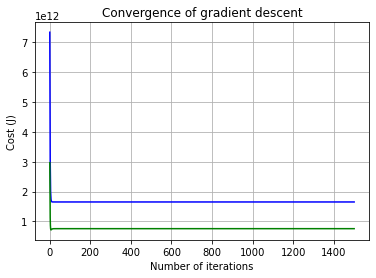

In [14]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [15]:
# Although this does converge it has a high cost which 

In [16]:
#Problem 1 Part B 

In [17]:
X = df_train.values[:,(1,2,3,4,5,6,7,8,9,10)]
X = np.hstack((X_0, X)) # Vlaues for problem 1 part B linear regression

X_f = df_test.values[:,(1,2,3,4,5,6,7,8,9,10)]
X_f = np.hstack((X_0f, X_f)) # Testing values for problem 1 part B linear reg. test

In [18]:
#The most relevant parameter again apperas to be area

In [19]:
theta = [0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0.]
iterations = 1500;
alpha = 0.0000000001;

In [20]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print ('Final value of theta = ', theta)
print('Final Cost = ', cost_history)

Final value of theta =  [0.19510722790337892 870.54216594764 0.6331839693477799 0.3032633145890587
 0.43760681756734765 0.17532033927329432 0.051307599622021895
 0.08970117719769505 0.01772569555171036 0.09939579800110454
 0.16517801600239185]
Final Cost =  [1.30508916e+13 1.29836171e+13 1.29167396e+13 ... 1.65321656e+12
 1.65320701e+12 1.65319753e+12]


Text(0.5, 1.0, 'Convergence of gradient descent')

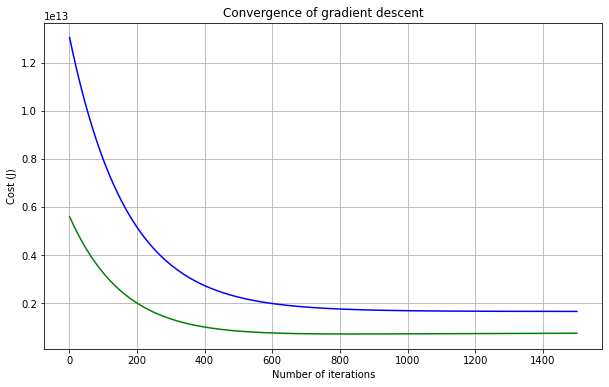

In [21]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [22]:
# The final cost is still to larg

In [23]:
# Number 2 part A

In [24]:
# First normalization


In [25]:
num_vars=['area','bedrooms','bathrooms','stories','parking','price']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]

df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [28]:
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.5,0.0,0.333333,0.0,0.120606
392,0.156495,0.5,0.0,0.333333,0.0,0.151515
231,0.180471,0.5,0.0,0.000000,0.0,0.254545
271,0.005013,1.0,0.0,0.333333,0.0,0.224242
250,0.121622,0.5,0.0,0.666667,0.0,0.239394


In [29]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain))
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [30]:
theta = [0. ,0. ,0. ,0. ,0. ,0.]
iterations = 1500; 
alpha = 0.001; #small learning rate becuase we have no normailziation or standardiztion

In [31]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print ('Final value of theta = ', theta)
print('Final Cost = ', cost_history[-1])

print(cost_history2)

Final value of theta =  [0.15059284 0.05066417 0.08449171 0.04399035 0.06174756 0.05505598]
Final Cost =  0.009755914430499115
[0.02444892 0.02439873 0.02434869 ... 0.00557905 0.00557759 0.00557614]


Text(0.5, 1.0, 'Convergence of gradient descent')

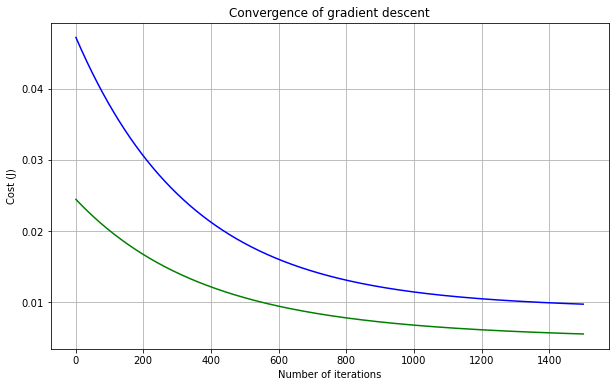

In [32]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [33]:
#Tthe cost is less than 0.01 compared to over a trillion
#Calling this a night and day difference

In [34]:
#Standardization

In [35]:
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [36]:
#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [37]:
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.5,0.0,0.333333,0.0,0.120606
392,0.156495,0.5,0.0,0.333333,0.0,0.151515
231,0.180471,0.5,0.0,0.000000,0.0,0.254545
271,0.005013,1.0,0.0,0.333333,0.0,0.224242
250,0.121622,0.5,0.0,0.666667,0.0,0.239394


In [38]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [39]:
theta = [0. ,0. ,0. ,0. ,0. ,0.]
iterations = 1500; 
alpha = 0.01; #small learning rate becuase we have no normailziation or standardiztion

In [40]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print ('Final value of theta = ', theta)
print('Final Cost = ', cost_history[-1])

Final value of theta =  [0.10137906 0.13740117 0.10065887 0.14089579 0.1252165  0.1155093 ]
Final Cost =  0.007160294225799279


Text(0.5, 1.0, 'Convergence of gradient descent')

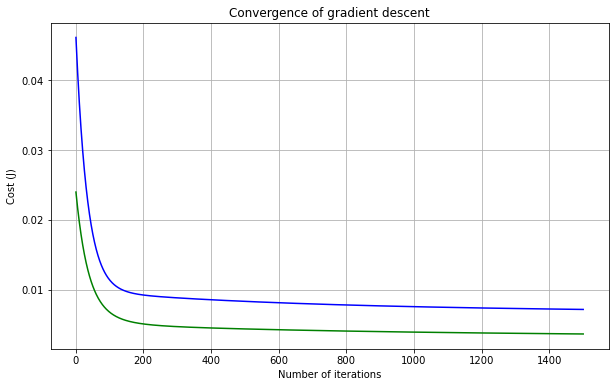

In [41]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [42]:
# For standarization, it seems to be far less different than what is was orginizaly
# it appears that the convergce is not close in the standarzation. Slightly lower 
# for both the traning and testing data set with nomrlaization

In [43]:
#Normalization

In [44]:
num_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]

In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [47]:
#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [48]:
theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,]
iterations = 1500;
alpha = 0.01; #small learning rate 

In [49]:
#Standardization


In [50]:
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [51]:
#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [54]:
theta = [0. ,0. ,0. ,0. ,0. ,0.,0.,0.,0.,0.,0.,0.]
iterations = 1500; 
alpha = 0.01; #small learning rate becuase we have no normailziation or standardiztion

Text(0.5, 1.0, 'Convergence of gradient descent')

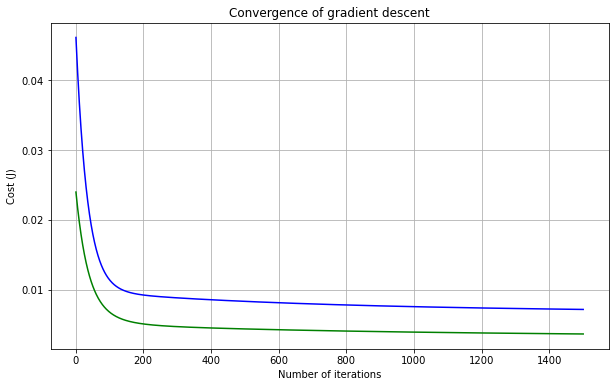

In [56]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [57]:
#The cost model before  looks identical, as it has been unchaged due to the binary options

In [58]:
# Number 3 Part A

In [59]:
def compute_cost(X, y, theta):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions)
    sqrErrors = np.square(errors)
    
    penalty = 0.01
    penMod = theta
    penMod[0] = 0;
    penMod = np.square(penalty)
    penMod = np.sum(penMod, axis=0)
    
    J = 1/(2*m) * (np.sum(sqrErrors) + penalty*penMod)
    
    return J

In [60]:
num_vars=['area','bedrooms','bathrooms','stories','parking','price']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]

#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])


In [61]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain))
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [62]:
theta = [0. ,0. ,0. ,0. ,0. ,0.]
iterations = 1500; 
alpha = 0.001; #small learning rate becuase we have no normailziation or standardiztion

Text(0.5, 1.0, 'Convergence of gradient descent')

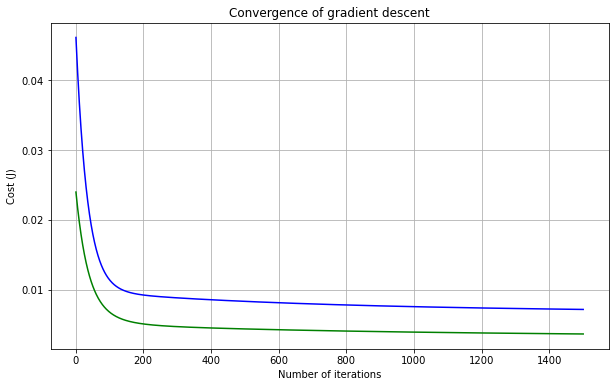

In [64]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [65]:
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

theta = [0. ,0. ,0. ,0. ,0. ,0.]
iterations = 1500; 
alpha = 0.01; #small learning rate 

In [67]:
# The cost seems to be the same for both Standarsiztion and Normalization. The difference between the normlization test and training cost is smaller, but for stnadriszation it remianed the same 

In [68]:
#Problem 3 Part B

In [69]:
num_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]

#define standard scaler for normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])



Text(0.5, 1.0, 'Convergence of gradient descent')

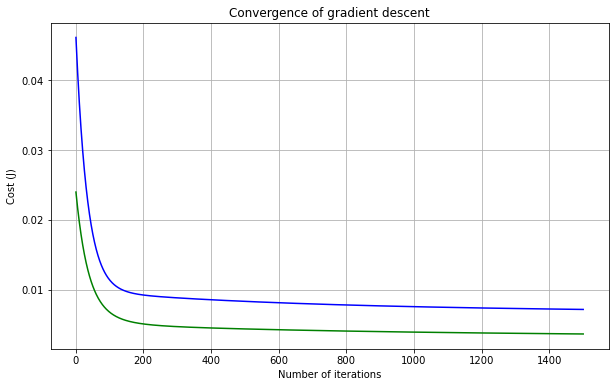

In [71]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [72]:
#Standardization

In [78]:
theta = [0. ,0. ,0. ,0. ,0. ,0.]
iterations = 1500; 
alpha = 0.01; #small learning rate becuase we have no normailziation or standardiztion

Text(0.5, 1.0, 'Convergence of gradient descent')

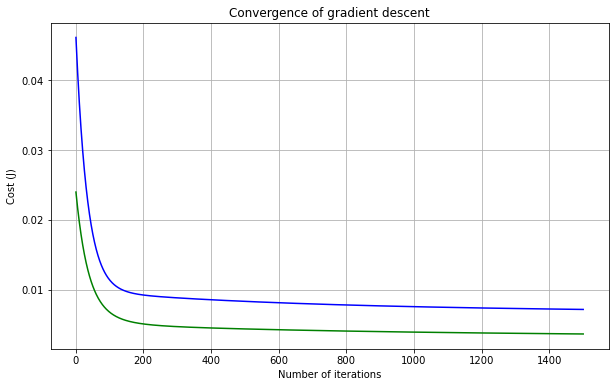

In [80]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.plot(range(1, iterations+1), cost_history2, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')